<p style = "font-size : 50px; font-family : 'Comic Sans MS'; text-align : center; border-radius: 5px 5px;"><strong>Chronic Kidney Disease Prediction</strong></p>

### **DATA UNDERSTANDING** 

 #### 1. Pengumpulan Data
   * Sumber data :  https://archive.ics.uci.edu/dataset/336/chronic+kidney+disease
   * Data : Chronic_Kidney_Disease.csv

In [308]:
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# import plotly.express as px

In [309]:
data = pd.read_csv ('kidney_disease.csv')
data

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,395,55.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,...,47,6700,4.9,no,no,no,good,no,no,notckd
396,396,42.0,70.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,...,54,7800,6.2,no,no,no,good,no,no,notckd
397,397,12.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,...,49,6600,5.4,no,no,no,good,no,no,notckd
398,398,17.0,60.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,...,51,7200,5.9,no,no,no,good,no,no,notckd


#### 2. Deskripsi Data

> Berikut ini pemahaman atribut setiap kolom :

<table border="1" cellpadding="5" cellspacing="0">
  <thead>
    <tr>
      <th>Kolom</th>
      <th>Nama atribut</th>
      <th>Deskripsi</th>
      <th>Tipe</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <td>Age</td>
      <td>Age</td>
      <td>Identitas unik untuk setiap pasien</td>
      <td>Numerical</td>
    </tr>
    <tr>
      <td>bp</td>
      <td>Blood Pressure</td>
      <td>Pembacaan tekanan darah pasien</td>
      <td>Numerical</td>
    </tr>
    <tr>
      <td>sg</td>
      <td>Specific Gravity</td>
      <td>Berat jenis urin, untuk menunjukkan fungsi ginjal</td>
      <td>Nominal</td>
    </tr>
    <tr>
      <td>al</td>
      <td>Albumin</td>
      <td>Kadar albumin dalam plasma darah</td>
      <td>Nominal</td>
    </tr>
    <tr>
      <td>su</td>
      <td>Sugar</td>
      <td>Tingkat gula dalam plasma darah</td>
      <td>Nominal</td>
    </tr>
    <tr>
      <td>rbc</td>
      <td>Red Blood Cells</td>
      <td>Jumlah sel darah merah dalam plasma darah</td>
      <td>Nominal</td>
    </tr>
    <tr>
      <td>pc</td>
      <td>Pus Cell</td>
      <td>Jumlah sel darah putih dalam urin</td>
      <td>Nominal</td>
    </tr>
    <tr>
      <td>pcc</td>
      <td>Pus Cell Clumps</td>
      <td>Gumpalan sel nanah dalam urin tanda terdapat infeksi bakteri</td>
      <td>Nominal</td>
    </tr>
    <tr>
      <td>ba</td>
      <td>Bacteria</td>
      <td>Kehadiran infeksi bakteri dalam urin</td>
      <td>Nominal</td>
    </tr>
    <tr>
      <td>bgr</td>
      <td>Blood Glucose Random</td>
      <td>Pengukuran kadar glukosa dalam darah secara acak tanpa mempertimbangkan waktu terakhir pasien mengonsumsi makanan</td>
      <td>Numerical</td>
    </tr>
    <tr>
      <td>bu</td>
      <td>Blood Urea</td>
      <td>Kadar urea dalam plasma darah</td>
      <td>Numerical</td>
    </tr>
    <tr>
      <td>sc</td>
      <td>Serum Creatinine</td>
      <td>Kadar kreatin dalam otot pasien yang dikeluarkan melalui ginjal</td>
      <td>Numerical</td>
    </tr>
    <tr>
      <td>sod</td>
      <td>Sodium</td>
      <td>Kadar mineral natrium dalam darah</td>
      <td>Numerical</td>
    </tr>
    <tr>
      <td>pot</td>
      <td>Potassium</td>
      <td>Kadar mineral kalium dalam darah</td>
      <td>Numerical</td>
    </tr>
    <tr>
      <td>hemo</td>
      <td>Hemoglobin</td>
      <td>Kadar protein yang bertanggung jawab mengangkut oksigen dalam sel darah merah</td>
      <td>Numerical</td>
    </tr>
    <tr>
      <td>pcv</td>
      <td>Packed Cell Volume</td>
      <td>Persentase volume sel darah dalam sampel darah</td>
      <td>Numerical</td>
    </tr>
    <tr>
      <td>wc</td>
      <td>White Blood Cell Count</td>
      <td>Jumlah sel darah putih, menunjukkan imun</td>
      <td>Numerical</td>
    </tr>
    <tr>
      <td>rc</td>
      <td>Red Blood Cell Count (rc)</td>
      <td>Jumlah sel darah merah</td>
      <td>Numerical</td>
    </tr>
    <tr>
      <td>htn</td>
      <td>Hypertension</td>
      <td>Kondisi pasien memiliki tekanan darah tinggi secara terus menerus pada pembuluh darah</td>
      <td>Nominal</td>
    </tr>
    <tr>
      <td>dm</td>
      <td>Diabetes Mellitus</td>
      <td>Gangguan produksi atau respons tubuh terhadap insulin, suatu kondisi metabolisme kadar glukosa darah yang tinggi.</td>
      <td>Nominal</td>
    </tr>
    <tr>
      <td>cad</td>
      <td>Coronary Artery Disease</td>
      <td>Kondisi jantung mengalami penyempitan atau penyumbatan pembuluh darah akibat penumpukan plak sehingga mengalami kesulitan memasok cukup nutrisi, oksigen, dan darah ke otot jantung</td>
      <td>Nominal</td>
    </tr>
    <tr>
      <td>appet</td>
      <td>Appetite</td>
      <td>Keinginan pasien untuk makan makanan</td>
      <td>Nominal</td>
    </tr>
    <tr>
      <td>pe</td>
      <td>Pedal Edema</td>
      <td>Pembengkakan yang terjadi di area kaki pasien akibat peradangan atau cedera</td>
      <td>Nominal</td>
    </tr>
    <tr>
      <td>ane</td>
      <td>Anemia</td>
      <td>Jumlah sel darah merah tidak mencukupi untuk mengangkut oksigen ke seluruh tubuh</td>
      <td>Nominal</td>
    </tr>
    <tr>
      <td>Classification</td>
      <td>Class</td>
      <td>Status kesehatan pasien terdiagnosis positif atau negatif penyakit ginjal kronis</td>
      <td>Nominal</td>
    </tr>
  </tbody>
</table>

In [310]:
# Ketersediaan kuantitas data (record/data dan field/atribut)

data.shape

(400, 26)

In [311]:
# Mengecek tipe atrtibut

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              400 non-null    int64  
 1   age             391 non-null    float64
 2   bp              388 non-null    float64
 3   sg              353 non-null    float64
 4   al              354 non-null    float64
 5   su              351 non-null    float64
 6   rbc             248 non-null    object 
 7   pc              335 non-null    object 
 8   pcc             396 non-null    object 
 9   ba              396 non-null    object 
 10  bgr             356 non-null    float64
 11  bu              381 non-null    float64
 12  sc              383 non-null    float64
 13  sod             313 non-null    float64
 14  pot             312 non-null    float64
 15  hemo            348 non-null    float64
 16  pcv             330 non-null    object 
 17  wc              295 non-null    obj

In [312]:
# Deskriptif statistik

data.describe()

,id,age,bp,sg,al,su,bgr,bu,sc,sod,pot,hemo
count,400.000000,391.000000,388.000000,353.000000,354.000000,351.000000,356.000000,381.000000,383.000000,313.000000,312.000000,348.000000
mean,199.500000,51.483376,76.469072,1.017408,1.016949,0.450142,148.036517,57.425722,3.072454,137.528754,4.627244,12.526437
std,115.614301,17.169714,13.683637,0.005717,1.352679,1.099191,79.281714,50.503006,5.741126,10.408752,3.193904,2.912587
min,0.000000,2.000000,50.000000,1.005000,0.000000,0.000000,22.000000,1.500000,0.400000,4.500000,2.500000,3.100000
25%,99.750000,42.000000,70.000000,1.010000,0.000000,0.000000,99.000000,27.000000,0.900000,135.000000,3.800000,10.300000
50%,199.500000,55.000000,80.000000,1.020000,0.000000,0.000000,121.000000,42.000000,1.300000,138.000000,4.400000,12.650000
75%,299.250000,64.500000,80.000000,1.020000,2.000000,0.000000,163.000000,66.000000,2.800000,142.000000,4.900000,15.000000
max,399.000000,90.000000,180.000000,1.025000,5.000000,5.000000,490.000000,391.000000,76.000000,163.000000,47.000000,17.800000


In [313]:
# Mengecek distribusi kelas data

Distribusi_kelas_data = data['classification'].value_counts()
Distribusi_kelas_data

ckd       248
notckd    150
ckd\t       2
Name: classification, dtype: int64

#### 3. Eksplorasi data awal

<Axes: ylabel='classification'>

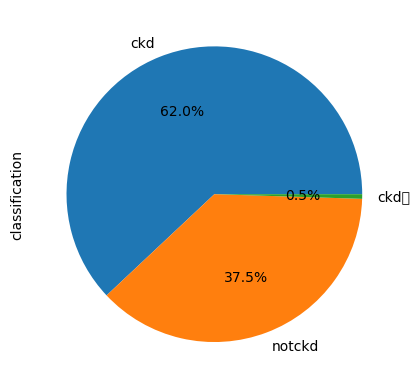

In [314]:
#Distribusi kelas

Atribut_target = data['classification']
Atribut_target.value_counts().plot.pie(autopct='%1.1f%%')

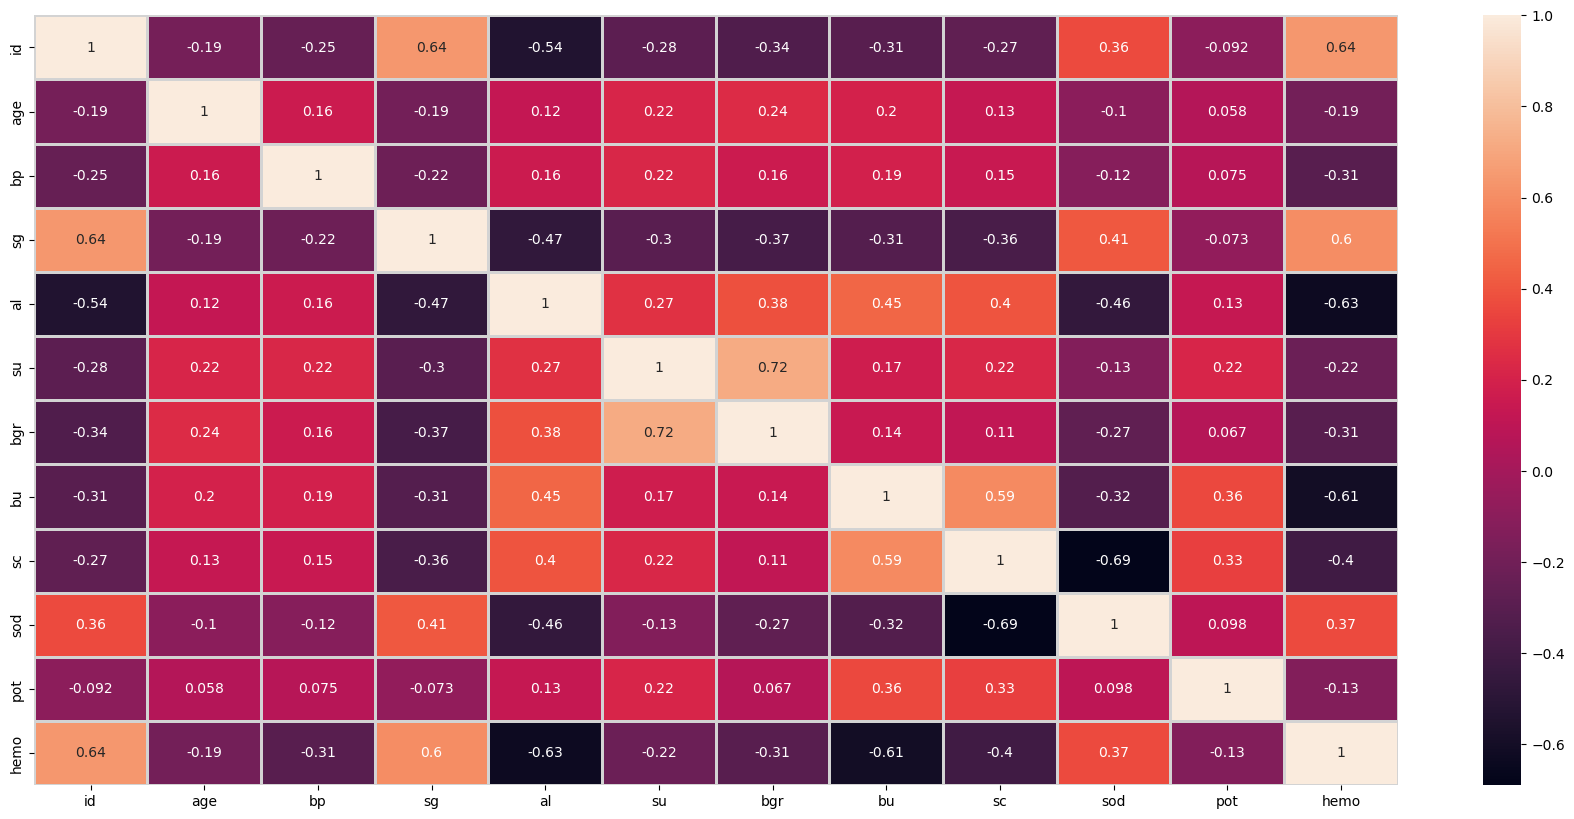

In [315]:
# heatmap of data

plt.figure(figsize = (22,10))

sns.heatmap(data.corr(), annot = True, linewidths = 2, linecolor = 'lightgrey')
plt.show()

#### 4. Verifikasi Kualitas Data

In [316]:
# Pemeriksaan kelengkapan data (nilai yang hilang/kosong/missing values)

print(data.isnull().sum())

id                  0
age                 9
bp                 12
sg                 47
al                 46
su                 49
rbc               152
pc                 65
pcc                 4
ba                  4
bgr                44
bu                 19
sc                 17
sod                87
pot                88
hemo               52
pcv                70
wc                105
rc                130
htn                 2
dm                  2
cad                 2
appet               1
pe                  1
ane                 1
classification      0
dtype: int64


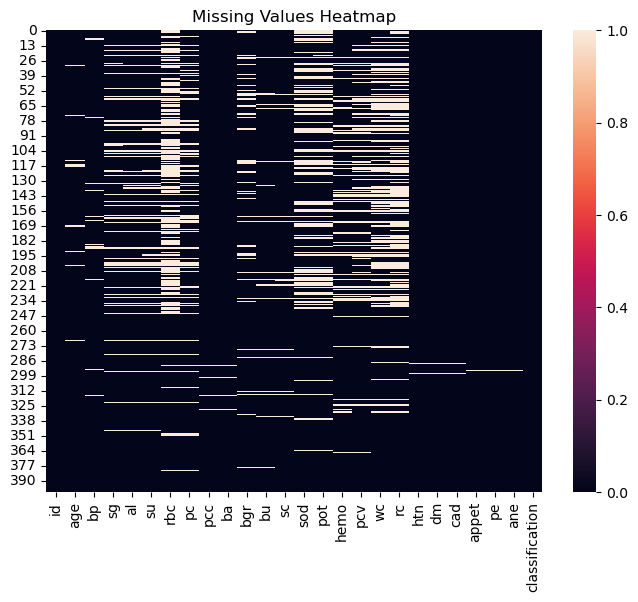

In [317]:
# Membuat heatmap untuk missing values

plt.figure(figsize=(8, 6))
sns.heatmap(data.isnull())
plt.title('Missing Values Heatmap')
plt.show()

In [318]:
# Mengecak persentase missingg value

Missing_values = (data.isnull().sum() / len(data) * 100)
Missing_value_percent= Missing_values.apply(lambda x: f"{x:.1f}%")

# Menampilkan hasil
print(Missing_value_percent)

id                 0.0%
age                2.2%
bp                 3.0%
sg                11.8%
al                11.5%
su                12.2%
rbc               38.0%
pc                16.2%
pcc                1.0%
ba                 1.0%
bgr               11.0%
bu                 4.8%
sc                 4.2%
sod               21.8%
pot               22.0%
hemo              13.0%
pcv               17.5%
wc                26.2%
rc                32.5%
htn                0.5%
dm                 0.5%
cad                0.5%
appet              0.2%
pe                 0.2%
ane                0.2%
classification     0.0%
dtype: object


In [319]:
data.isnull().sum()

id                  0
age                 9
bp                 12
sg                 47
al                 46
su                 49
rbc               152
pc                 65
pcc                 4
ba                  4
bgr                44
bu                 19
sc                 17
sod                87
pot                88
hemo               52
pcv                70
wc                105
rc                130
htn                 2
dm                  2
cad                 2
appet               1
pe                  1
ane                 1
classification      0
dtype: int64

In [320]:
# Mengecak duplikasi data

data.duplicated().sum()

0

In [321]:
# Memeriksa data yang memiliki nilai unik

for columns in data:
    print(f" Atribut = {columns}\n {data[columns].unique().tolist()} \n")

 Atribut = id
 [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218,

## **DATA PREPARATION** 

#### 1. Seleksi Data

In [322]:
# Pemilihan data/baris (instance selection)
data.columns

Index(['id', 'age', 'bp', 'sg', 'al', 'su', 'rbc', 'pc', 'pcc', 'ba', 'bgr',
       'bu', 'sc', 'sod', 'pot', 'hemo', 'pcv', 'wc', 'rc', 'htn', 'dm', 'cad',
       'appet', 'pe', 'ane', 'classification'],
      dtype='object')

In [323]:
# dropping id column
data.drop('id', axis = 1, inplace = True)

In [324]:
data

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,...,35,7300,4.6,no,no,no,good,no,no,ckd
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,55.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,140.0,...,47,6700,4.9,no,no,no,good,no,no,notckd
396,42.0,70.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,75.0,...,54,7800,6.2,no,no,no,good,no,no,notckd
397,12.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,100.0,...,49,6600,5.4,no,no,no,good,no,no,notckd
398,17.0,60.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,114.0,...,51,7200,5.9,no,no,no,good,no,no,notckd


#### 2. Pembersihan Data 

In [325]:
# Mengganti nama atribut agar lebih mudah dipahami

data.columns = ['Age','Blood Pressure','Specific Gravity','Albumin','Sugar','Red Blood Cells','Pus Cell',
                'Pus Cell Clumps','Bacteria','Blood Glucose Random','Blood Urea','Serum Creatinine','Sodium',
                'Potassium','Hemoglobin','Packed Cell Volume','White Blood Cell Count','Red Blood Cell Count',
                'Hypertension','Diabetes Mellitus','Coronary Artery Disease','Appetite','Peda Edema','Anemia','Class']
data

,Age,Blood Pressure,Specific Gravity,Albumin,Sugar,Red Blood Cells,Pus Cell,Pus Cell Clumps,Bacteria,Blood Glucose Random,...,Packed Cell Volume,White Blood Cell Count,Red Blood Cell Count,Hypertension,Diabetes Mellitus,Coronary Artery Disease,Appetite,Peda Edema,Anemia,Class
0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,...,35,7300,4.6,no,no,no,good,no,no,ckd
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,55.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,140.0,...,47,6700,4.9,no,no,no,good,no,no,notckd
396,42.0,70.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,75.0,...,54,7800,6.2,no,no,no,good,no,no,notckd
397,12.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,100.0,...,49,6600,5.4,no,no,no,good,no,no,notckd
398,17.0,60.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,114.0,...,51,7200,5.9,no,no,no,good,no,no,notckd


In [326]:
# Ada beberapa ambiguitas pada kolom-kolom akan di perbaiki
# 1. Data tidak konsisten yang terdapat pada atribut "Diabetes Mellitus"
# 2. Data tidak relavan yang terdapat pada atribut "Diabetes Mellitus, Coronary Artery Disease, Class"

data['Diabetes Mellitus'].replace(to_replace = {'\tno':'no','\tyes':'yes',' yes':'yes'},inplace=True)
data['Coronary Artery Disease'] = data['Coronary Artery Disease'].replace(to_replace = '\tno', value='no')
data['Class'] = data['Class'].replace(to_replace = {'ckd\t': 'ckd'})

In [327]:
cols = ['Diabetes Mellitus', 'Coronary Artery Disease', 'Class']

for columns in cols:
    print(f"{columns} has {data[columns].unique()} values\n")

Diabetes Mellitus has ['yes' 'no' nan] values

Coronary Artery Disease has ['no' 'yes' nan] values

Class has ['ckd' 'notckd'] values



In [328]:
# Atribut kolom 'Packed Cell Volume', 'White Blood Cell Count' dan 'Red Blood Cell Count' adalah tipe nominal (object) tidak sesui dengan nilai data, sehingga perlu mengubahnya menjadi tipe numerical (float64).

data['Packed Cell Volume'] = pd.to_numeric(data['Packed Cell Volume'], errors='coerce')
data['White Blood Cell Count'] = pd.to_numeric(data['White Blood Cell Count'], errors='coerce')
data['Red Blood Cell Count'] = pd.to_numeric(data['Red Blood Cell Count'], errors='coerce')

In [329]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      391 non-null    float64
 1   Blood Pressure           388 non-null    float64
 2   Specific Gravity         353 non-null    float64
 3   Albumin                  354 non-null    float64
 4   Sugar                    351 non-null    float64
 5   Red Blood Cells          248 non-null    object 
 6   Pus Cell                 335 non-null    object 
 7   Pus Cell Clumps          396 non-null    object 
 8   Bacteria                 396 non-null    object 
 9   Blood Glucose Random     356 non-null    float64
 10  Blood Urea               381 non-null    float64
 11  Serum Creatinine         383 non-null    float64
 12  Sodium                   313 non-null    float64
 13  Potassium                312 non-null    float64
 14  Hemoglobin               3

In [330]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      391 non-null    float64
 1   Blood Pressure           388 non-null    float64
 2   Specific Gravity         353 non-null    float64
 3   Albumin                  354 non-null    float64
 4   Sugar                    351 non-null    float64
 5   Red Blood Cells          248 non-null    object 
 6   Pus Cell                 335 non-null    object 
 7   Pus Cell Clumps          396 non-null    object 
 8   Bacteria                 396 non-null    object 
 9   Blood Glucose Random     356 non-null    float64
 10  Blood Urea               381 non-null    float64
 11  Serum Creatinine         383 non-null    float64
 12  Sodium                   313 non-null    float64
 13  Potassium                312 non-null    float64
 14  Hemoglobin               3

In [331]:
Nominal_Cols = [columns for columns in data.columns if data[columns].dtype == 'object']
Numerical_Cols = [columns for columns in data.columns if data[columns].dtype != 'object']

Distribusi atribut numerik dari 14 kolom


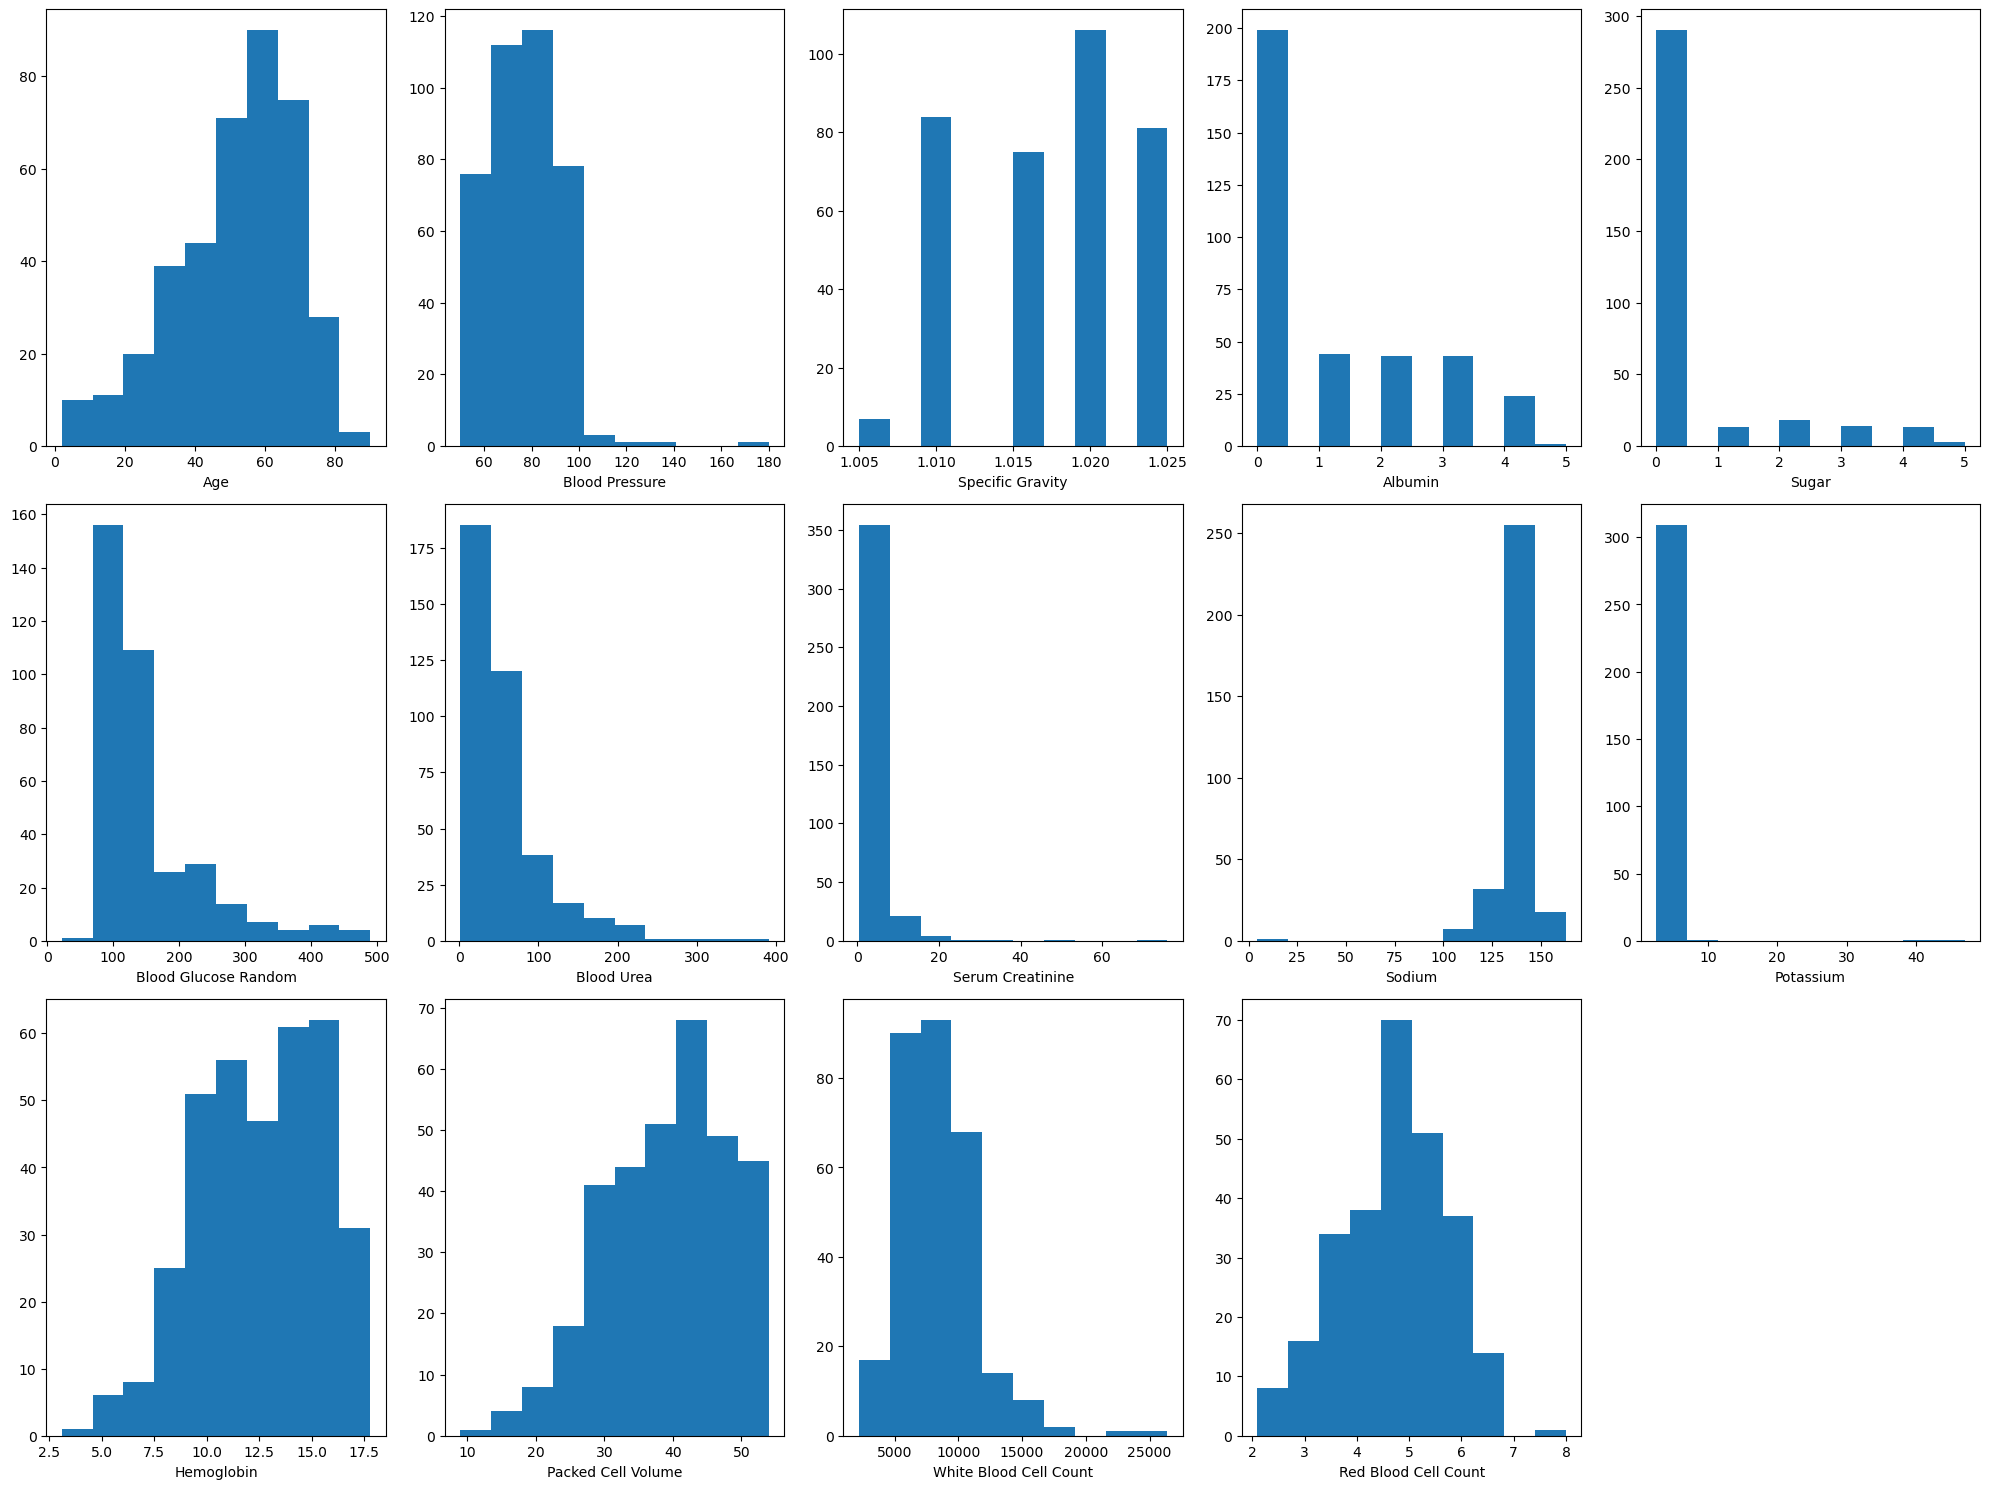

In [332]:
# Visualisasi distribusi atribut tipe numerical

plt.figure(figsize = (20, 15))
plotnumber = 1

print('Distribusi atribut numerik dari 14 kolom')
for column in Numerical_Cols:
    if plotnumber <= 14:
        ax = plt.subplot(3, 5, plotnumber)
        plt.hist(data[column])
        plt.xlabel(column)
        
    plotnumber += 1

plt.tight_layout()
plt.show()


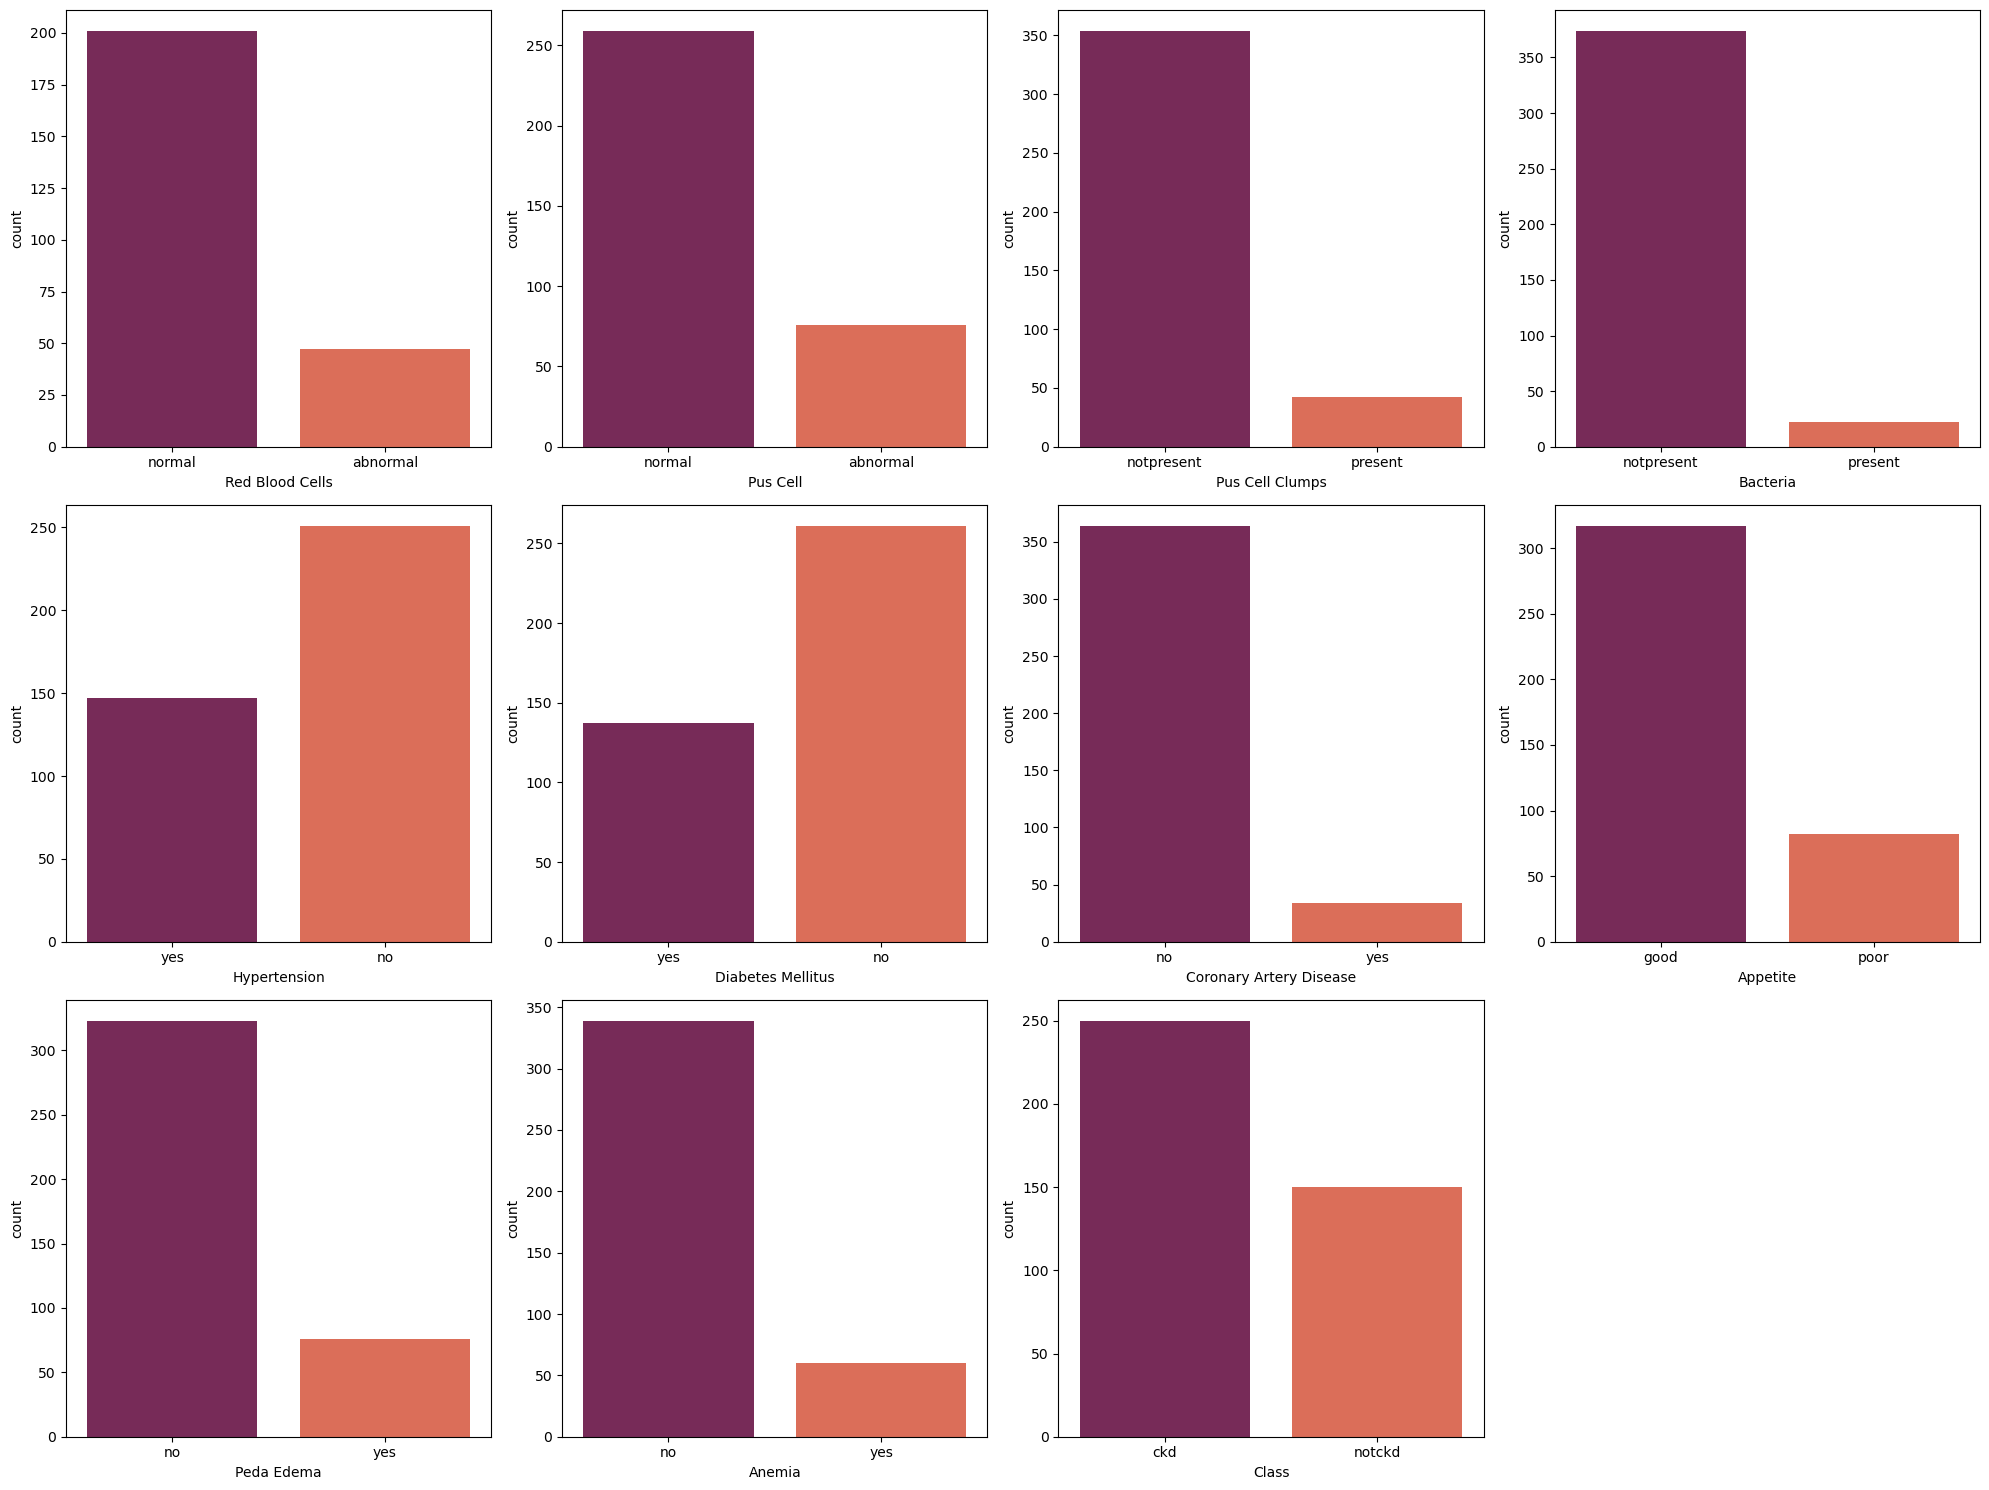

In [333]:
# Visualisasi distribusi atribut tipe nominal

plt.figure(figsize = (20, 15))
plotnumber = 1

for column in Nominal_Cols:
    if plotnumber <= 11:
        ax = plt.subplot(3, 4, plotnumber)
        sns.countplot(x=data[column], palette = 'rocket', ax=ax)
        plt.xlabel(column)
        plotnumber += 1

plt.tight_layout()
plt.show()

#### 3. Penanganan Missing Value

In [334]:
# Menampilkan jumlah dan persentase missing value untuk kolom nominal

print(f"Missing value pada tipe data nominal: \n")
for col in data[Nominal_Cols]:
    print(f"{col} {data[col].unique().tolist()}\n")

Missing value pada tipe data nominal: 

Red Blood Cells [nan, 'normal', 'abnormal']

Pus Cell ['normal', 'abnormal', nan]

Pus Cell Clumps ['notpresent', 'present', nan]

Bacteria ['notpresent', 'present', nan]

Hypertension ['yes', 'no', nan]

Diabetes Mellitus ['yes', 'no', nan]

Coronary Artery Disease ['no', 'yes', nan]

Appetite ['good', 'poor', nan]

Peda Edema ['no', 'yes', nan]

Anemia ['no', 'yes', nan]

Class ['ckd', 'notckd']



In [335]:
data

,Age,Blood Pressure,Specific Gravity,Albumin,Sugar,Red Blood Cells,Pus Cell,Pus Cell Clumps,Bacteria,Blood Glucose Random,...,Packed Cell Volume,White Blood Cell Count,Red Blood Cell Count,Hypertension,Diabetes Mellitus,Coronary Artery Disease,Appetite,Peda Edema,Anemia,Class
0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,...,44.0,7800.0,5.2,yes,yes,no,good,no,no,ckd
1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,...,38.0,6000.0,NaN,no,no,no,good,no,no,ckd
2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,...,31.0,7500.0,NaN,no,yes,no,poor,no,yes,ckd
3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,...,32.0,6700.0,3.9,yes,no,no,poor,yes,yes,ckd
4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,...,35.0,7300.0,4.6,no,no,no,good,no,no,ckd
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,55.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,140.0,...,47.0,6700.0,4.9,no,no,no,good,no,no,notckd
396,42.0,70.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,75.0,...,54.0,7800.0,6.2,no,no,no,good,no,no,notckd
397,12.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,100.0,...,49.0,6600.0,5.4,no,no,no,good,no,no,notckd
398,17.0,60.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,114.0,...,51.0,7200.0,5.9,no,no,no,good,no,no,notckd


In [336]:
from sklearn.preprocessing import LabelEncoder

lb = LabelEncoder()

# Definisi atribut tipe nominal encoding tipe numerik
# lb_col_RBC = 'Red Blood Cells'
# lb_col_encoded_RBC = 'Red Blood Cells_no'

# lb_col_PC = 'Pus Cell'
# lb_col_encoded_PC = 'Pus Cell_no'

# lb_col_PCC = 'Pus Cell Clumps'
# lb_col_encoded_PCC = 'Pus Cell Clumps_no'

# lb_col_ba = 'Bacteria'
# lb_col_encoded_ba = 'Bacteria_no'

# lb_col_htn = 'Hypertension'
# lb_col_encoded_htn = 'Hypertension_no'

# lb_col_dm = 'Diabetes Mellitus'
# lb_col_encoded_dm = 'Diabetes Mellitus_no'

# lb_col_cad = 'Coronary Artery Disease'
# lb_col_encoded_cad = 'Coronary Artery Disease_no'

# lb_col_appet = 'Appetite'
# lb_col_encoded_appet = 'Appetite_no'

# lb_col_pe = 'Peda Edema'
# lb_col_encoded_pe = 'Peda Edema_no'

# lb_col_ane = 'Anemia'
# lb_col_encoded_ane = 'Anemia_no'


for columns in data[Nominal_Cols]:
    data[columns] = lb.fit_transform(data[columns])

In [337]:
# Red Blood Cells [nan=2, 'normal=1', 'abnormal=0']
# lb.fit(data.loc[:, lb_col_RBC]) 
# # Pus Cell ['normal=1', 'abnormal=0', nan=2]
# lb.fit(data.loc[:, lb_col_PC])
# # Pus Cell Clumps ['notpresent=0', 'present=1', nan=2]
# lb.fit(data.loc[:, lb_col_PCC])
# # Bacteria ['notpresent=0', 'present=1', nan=2]
# lb.fit(data.loc[:, lb_col_ba])
# # Hypertension ['yes=1', 'no=0', nan=2]
# lb.fit(data.loc[:, lb_col_htn])
# # Diabetes Mellitus ['yes=1', 'no=0', nan=2]
# lb.fit(data.loc[:, lb_col_dm])
# # Coronary Artery Disease ['no=0', 'yes=1', nan=2]
# lb.fit(data.loc[:, lb_col_cad])
# # Appetite ['good=0', 'poor=1', nan=2]
# lb.fit(data.loc[:, lb_col_appet])
# # Peda Edema ['no=0', 'yes= 1', nan=2]
# lb.fit(data.loc[:, lb_col_pe])
# # Anemia ['no=0', 'yes=1', nan=2]
# lb.fit(data.loc[:, lb_col_ane])

In [338]:
# mengecek label mapping

# dict(zip(lb.classes_,lb.transform(lb.classes_)))

In [339]:
# data[lb_col_encoded_RBC] = lb.transform(data[lb_col_RBC])
# data[["Red Blood Cells", 'Red Blood Cells_no']].head(7)


In [340]:
data

,Age,Blood Pressure,Specific Gravity,Albumin,Sugar,Red Blood Cells,Pus Cell,Pus Cell Clumps,Bacteria,Blood Glucose Random,...,Packed Cell Volume,White Blood Cell Count,Red Blood Cell Count,Hypertension,Diabetes Mellitus,Coronary Artery Disease,Appetite,Peda Edema,Anemia,Class
0,48.0,80.0,1.020,1.0,0.0,2,1,0,0,121.0,...,44.0,7800.0,5.2,1,1,0,0,0,0,0
1,7.0,50.0,1.020,4.0,0.0,2,1,0,0,NaN,...,38.0,6000.0,NaN,0,0,0,0,0,0,0
2,62.0,80.0,1.010,2.0,3.0,1,1,0,0,423.0,...,31.0,7500.0,NaN,0,1,0,1,0,1,0
3,48.0,70.0,1.005,4.0,0.0,1,0,1,0,117.0,...,32.0,6700.0,3.9,1,0,0,1,1,1,0
4,51.0,80.0,1.010,2.0,0.0,1,1,0,0,106.0,...,35.0,7300.0,4.6,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,55.0,80.0,1.020,0.0,0.0,1,1,0,0,140.0,...,47.0,6700.0,4.9,0,0,0,0,0,0,1
396,42.0,70.0,1.025,0.0,0.0,1,1,0,0,75.0,...,54.0,7800.0,6.2,0,0,0,0,0,0,1
397,12.0,80.0,1.020,0.0,0.0,1,1,0,0,100.0,...,49.0,6600.0,5.4,0,0,0,0,0,0,1
398,17.0,60.0,1.025,0.0,0.0,1,1,0,0,114.0,...,51.0,7200.0,5.9,0,0,0,0,0,0,1


In [342]:
# data[imputed_col_encoded] = data[imputed_col_encoded].map(lambda x:np.nan if x==2 else x)
# data.head(20)

for cols in data[Nominal_Cols]:
    data[cols] = data[cols].map(lambda x:np.nan if x==2 else x)

In [343]:
data

,Age,Blood Pressure,Specific Gravity,Albumin,Sugar,Red Blood Cells,Pus Cell,Pus Cell Clumps,Bacteria,Blood Glucose Random,...,Packed Cell Volume,White Blood Cell Count,Red Blood Cell Count,Hypertension,Diabetes Mellitus,Coronary Artery Disease,Appetite,Peda Edema,Anemia,Class
0,48.0,80.0,1.020,1.0,0.0,NaN,1.0,0.0,0.0,121.0,...,44.0,7800.0,5.2,1.0,1.0,0.0,0.0,0.0,0.0,0
1,7.0,50.0,1.020,4.0,0.0,NaN,1.0,0.0,0.0,NaN,...,38.0,6000.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0
2,62.0,80.0,1.010,2.0,3.0,1.0,1.0,0.0,0.0,423.0,...,31.0,7500.0,NaN,0.0,1.0,0.0,1.0,0.0,1.0,0
3,48.0,70.0,1.005,4.0,0.0,1.0,0.0,1.0,0.0,117.0,...,32.0,6700.0,3.9,1.0,0.0,0.0,1.0,1.0,1.0,0
4,51.0,80.0,1.010,2.0,0.0,1.0,1.0,0.0,0.0,106.0,...,35.0,7300.0,4.6,0.0,0.0,0.0,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,55.0,80.0,1.020,0.0,0.0,1.0,1.0,0.0,0.0,140.0,...,47.0,6700.0,4.9,0.0,0.0,0.0,0.0,0.0,0.0,1
396,42.0,70.0,1.025,0.0,0.0,1.0,1.0,0.0,0.0,75.0,...,54.0,7800.0,6.2,0.0,0.0,0.0,0.0,0.0,0.0,1
397,12.0,80.0,1.020,0.0,0.0,1.0,1.0,0.0,0.0,100.0,...,49.0,6600.0,5.4,0.0,0.0,0.0,0.0,0.0,0.0,1
398,17.0,60.0,1.025,0.0,0.0,1.0,1.0,0.0,0.0,114.0,...,51.0,7200.0,5.9,0.0,0.0,0.0,0.0,0.0,0.0,1


In [344]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      391 non-null    float64
 1   Blood Pressure           388 non-null    float64
 2   Specific Gravity         353 non-null    float64
 3   Albumin                  354 non-null    float64
 4   Sugar                    351 non-null    float64
 5   Red Blood Cells          248 non-null    float64
 6   Pus Cell                 335 non-null    float64
 7   Pus Cell Clumps          396 non-null    float64
 8   Bacteria                 396 non-null    float64
 9   Blood Glucose Random     356 non-null    float64
 10  Blood Urea               381 non-null    float64
 11  Serum Creatinine         383 non-null    float64
 12  Sodium                   313 non-null    float64
 13  Potassium                312 non-null    float64
 14  Hemoglobin               3

In [354]:
data_train = data.copy()

In [353]:
# MICE

from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.ensemble import RandomForestRegressor

Imputer_mice = IterativeImputer(
    estimator= RandomForestRegressor(max_depth=8),
    missing_values=np.nan,
    max_iter=10,
    initial_strategy='mean',
    imputation_order='ascending',
    verbose=2,
    random_state=100,
)

In [355]:
data_train

,Age,Blood Pressure,Specific Gravity,Albumin,Sugar,Red Blood Cells,Pus Cell,Pus Cell Clumps,Bacteria,Blood Glucose Random,...,Packed Cell Volume,White Blood Cell Count,Red Blood Cell Count,Hypertension,Diabetes Mellitus,Coronary Artery Disease,Appetite,Peda Edema,Anemia,Class
0,48.0,80.0,1.020,1.0,0.0,NaN,1.0,0.0,0.0,121.0,...,44.0,7800.0,5.2,1.0,1.0,0.0,0.0,0.0,0.0,0
1,7.0,50.0,1.020,4.0,0.0,NaN,1.0,0.0,0.0,NaN,...,38.0,6000.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0
2,62.0,80.0,1.010,2.0,3.0,1.0,1.0,0.0,0.0,423.0,...,31.0,7500.0,NaN,0.0,1.0,0.0,1.0,0.0,1.0,0
3,48.0,70.0,1.005,4.0,0.0,1.0,0.0,1.0,0.0,117.0,...,32.0,6700.0,3.9,1.0,0.0,0.0,1.0,1.0,1.0,0
4,51.0,80.0,1.010,2.0,0.0,1.0,1.0,0.0,0.0,106.0,...,35.0,7300.0,4.6,0.0,0.0,0.0,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,55.0,80.0,1.020,0.0,0.0,1.0,1.0,0.0,0.0,140.0,...,47.0,6700.0,4.9,0.0,0.0,0.0,0.0,0.0,0.0,1
396,42.0,70.0,1.025,0.0,0.0,1.0,1.0,0.0,0.0,75.0,...,54.0,7800.0,6.2,0.0,0.0,0.0,0.0,0.0,0.0,1
397,12.0,80.0,1.020,0.0,0.0,1.0,1.0,0.0,0.0,100.0,...,49.0,6600.0,5.4,0.0,0.0,0.0,0.0,0.0,0.0,1
398,17.0,60.0,1.025,0.0,0.0,1.0,1.0,0.0,0.0,114.0,...,51.0,7200.0,5.9,0.0,0.0,0.0,0.0,0.0,0.0,1


In [356]:
data_train[Nominal_Cols].head(10)

,Red Blood Cells,Pus Cell,Pus Cell Clumps,Bacteria,Hypertension,Diabetes Mellitus,Coronary Artery Disease,Appetite,Peda Edema,Anemia,Class
0,NaN,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0
1,NaN,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0
3,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0
4,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
5,NaN,NaN,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0
6,NaN,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
7,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0
8,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0
9,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0


In [358]:
data_train[Nominal_Cols].isnull().sum()

Red Blood Cells            152
Pus Cell                    65
Pus Cell Clumps              4
Bacteria                     4
Hypertension                 2
Diabetes Mellitus            2
Coronary Artery Disease      2
Appetite                     1
Peda Edema                   1
Anemia                       1
Class                        0
dtype: int64

In [359]:
# Fit dalam dataset

data_train[Nominal_Cols] = Imputer_mice.fit_transform(data_train[Nominal_Cols])

[IterativeImputer] Completing matrix with shape (400, 11)
[IterativeImputer] Ending imputation round 1/10, elapsed time 4.42
[IterativeImputer] Change: 0.9906564388641903, scaled tolerance: 0.001 
[IterativeImputer] Ending imputation round 2/10, elapsed time 9.05
[IterativeImputer] Change: 1.0765382395382395, scaled tolerance: 0.001 
[IterativeImputer] Ending imputation round 3/10, elapsed time 13.21
[IterativeImputer] Change: 0.5609986119215259, scaled tolerance: 0.001 
[IterativeImputer] Ending imputation round 4/10, elapsed time 17.18
[IterativeImputer] Change: 0.6856272217422876, scaled tolerance: 0.001 
[IterativeImputer] Ending imputation round 5/10, elapsed time 21.19
[IterativeImputer] Change: 0.6296614672991458, scaled tolerance: 0.001 
[IterativeImputer] Ending imputation round 6/10, elapsed time 25.40
[IterativeImputer] Change: 0.4307764349313774, scaled tolerance: 0.001 
[IterativeImputer] Ending imputation round 7/10, elapsed time 29.47
[IterativeImputer] Change: 0.8480624

In [361]:
data_train[Nominal_Cols].isnull().sum()

Red Blood Cells            0
Pus Cell                   0
Pus Cell Clumps            0
Bacteria                   0
Hypertension               0
Diabetes Mellitus          0
Coronary Artery Disease    0
Appetite                   0
Peda Edema                 0
Anemia                     0
Class                      0
dtype: int64

In [362]:
data_train[Nominal_Cols]

,Red Blood Cells,Pus Cell,Pus Cell Clumps,Bacteria,Hypertension,Diabetes Mellitus,Coronary Artery Disease,Appetite,Peda Edema,Anemia,Class
0,0.726108,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
1,0.396851,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.000000,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
3,1.000000,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0
4,1.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
395,1.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
396,1.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
397,1.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
398,1.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [363]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      391 non-null    float64
 1   Blood Pressure           388 non-null    float64
 2   Specific Gravity         353 non-null    float64
 3   Albumin                  354 non-null    float64
 4   Sugar                    351 non-null    float64
 5   Red Blood Cells          400 non-null    float64
 6   Pus Cell                 400 non-null    float64
 7   Pus Cell Clumps          400 non-null    float64
 8   Bacteria                 400 non-null    float64
 9   Blood Glucose Random     356 non-null    float64
 10  Blood Urea               381 non-null    float64
 11  Serum Creatinine         383 non-null    float64
 12  Sodium                   313 non-null    float64
 13  Potassium                312 non-null    float64
 14  Hemoglobin               3

In [367]:
data_train[Numerical_Cols] = Imputer_mice.fit_transform(data[Numerical_Cols])

[IterativeImputer] Completing matrix with shape (400, 14)
[IterativeImputer] Ending imputation round 1/10, elapsed time 9.69
[IterativeImputer] Change: 3430.4350905716447, scaled tolerance: 26.400000000000002 
[IterativeImputer] Ending imputation round 2/10, elapsed time 19.05
[IterativeImputer] Change: 1910.1798880981614, scaled tolerance: 26.400000000000002 
[IterativeImputer] Ending imputation round 3/10, elapsed time 34.62
[IterativeImputer] Change: 1566.495565000494, scaled tolerance: 26.400000000000002 
[IterativeImputer] Ending imputation round 4/10, elapsed time 44.91
[IterativeImputer] Change: 1351.9012960887044, scaled tolerance: 26.400000000000002 
[IterativeImputer] Ending imputation round 5/10, elapsed time 54.15
[IterativeImputer] Change: 1836.6662170406578, scaled tolerance: 26.400000000000002 
[IterativeImputer] Ending imputation round 6/10, elapsed time 63.39
[IterativeImputer] Change: 1419.9156267639203, scaled tolerance: 26.400000000000002 
[IterativeImputer] Ending 

In [372]:
data_train.isnull().sum()

Age                        0
Blood Pressure             0
Specific Gravity           0
Albumin                    0
Sugar                      0
Red Blood Cells            0
Pus Cell                   0
Pus Cell Clumps            0
Bacteria                   0
Blood Glucose Random       0
Blood Urea                 0
Serum Creatinine           0
Sodium                     0
Potassium                  0
Hemoglobin                 0
Packed Cell Volume         0
White Blood Cell Count     0
Red Blood Cell Count       0
Hypertension               0
Diabetes Mellitus          0
Coronary Artery Disease    0
Appetite                   0
Peda Edema                 0
Anemia                     0
Class                      0
dtype: int64

In [373]:
data_train.describe()

,Age,Blood Pressure,Specific Gravity,Albumin,Sugar,Red Blood Cells,Pus Cell,Pus Cell Clumps,Bacteria,Blood Glucose Random,...,Packed Cell Volume,White Blood Cell Count,Red Blood Cell Count,Hypertension,Diabetes Mellitus,Coronary Artery Disease,Appetite,Peda Edema,Anemia,Class
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,...,400.000000,400.000000,400.000000,400.000000,400.00000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,51.485567,76.425763,1.017077,1.087878,0.477507,0.733498,0.779569,0.105000,0.055000,149.396939,...,37.790517,8520.548037,4.519434,0.367500,0.34250,0.085000,0.205000,0.190000,0.150000,0.375000
std,17.031505,13.506617,0.005521,1.321966,1.085576,0.356313,0.390669,0.306937,0.228266,77.615691,...,8.825163,2579.496318,0.969563,0.482728,0.47514,0.279231,0.404207,0.392792,0.357519,0.484729
min,2.000000,50.000000,1.005000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,22.000000,...,9.000000,2200.000000,2.100000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,42.000000,70.000000,1.013131,0.000000,0.000000,0.411060,0.828590,0.000000,0.000000,101.000000,...,32.000000,6900.000000,3.891458,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,54.500000,80.000000,1.015000,0.000419,0.000000,1.000000,1.000000,0.000000,0.000000,122.500000,...,37.000000,8400.000000,4.500000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,64.000000,80.000000,1.020000,2.000000,0.000000,1.000000,1.000000,0.000000,0.000000,165.087120,...,44.000000,9600.000000,5.200000,1.000000,1.00000,0.000000,0.000000,0.000000,0.000000,1.000000
max,90.000000,180.000000,1.025000,5.000000,5.000000,1.000000,1.000000,1.000000,1.000000,490.000000,...,54.000000,26400.000000,8.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000


In [380]:
data_train.corr()

,Age,Blood Pressure,Specific Gravity,Albumin,Sugar,Red Blood Cells,Pus Cell,Pus Cell Clumps,Bacteria,Blood Glucose Random,...,Packed Cell Volume,White Blood Cell Count,Red Blood Cell Count,Hypertension,Diabetes Mellitus,Coronary Artery Disease,Appetite,Peda Edema,Anemia,Class
Age,1.000000,0.159269,-0.204947,0.126401,0.231421,-0.034048,-0.138234,0.158502,0.043397,0.248222,...,-0.218550,0.125073,-0.271940,0.399554,0.370208,0.232139,0.156520,0.086123,0.058566,-0.225922
Blood Pressure,0.159269,1.000000,-0.210086,0.181789,0.220603,-0.234530,-0.176927,0.060526,0.112696,0.172251,...,-0.308233,0.048512,-0.245554,0.276739,0.231460,0.087402,0.178639,0.057149,0.200803,-0.291117
Specific Gravity,-0.204947,-0.210086,1.000000,-0.489313,-0.296472,0.419221,0.360626,-0.262122,-0.200250,-0.347923,...,0.577733,-0.235681,0.545197,-0.426670,-0.445622,-0.179652,-0.269254,-0.294921,-0.253988,0.746987
Albumin,0.126401,0.181789,-0.489313,1.000000,0.275635,-0.307897,-0.525756,0.366335,0.341080,0.357224,...,-0.564937,0.210470,-0.512029,0.518476,0.429326,0.249040,0.329844,0.431041,0.334649,-0.638223
Sugar,0.231421,0.220603,-0.296472,0.275635,1.000000,-0.126217,-0.208479,0.134975,0.096032,0.749649,...,-0.218289,0.193036,-0.233243,0.317714,0.496794,0.248643,0.065966,0.109228,0.073897,-0.341144
Red Blood Cells,-0.034048,-0.234530,0.419221,-0.307897,-0.126217,1.000000,0.287833,-0.042140,-0.119153,-0.193037,...,0.384789,-0.020764,0.335701,-0.141042,-0.242997,-0.109588,-0.178942,-0.175393,-0.119872,0.580080
Pus Cell,-0.138234,-0.176927,0.360626,-0.525756,-0.208479,0.287833,1.000000,-0.509399,-0.331087,-0.321789,...,0.451045,-0.127333,0.437764,-0.360408,-0.282678,-0.183207,-0.287375,-0.358084,-0.292514,0.437605
Pus Cell Clumps,0.158502,0.060526,-0.262122,0.366335,0.134975,-0.042140,-0.509399,1.000000,0.275082,0.226296,...,-0.245706,0.177199,-0.247408,0.195623,0.165236,0.188029,0.189688,0.104356,0.175861,-0.265313
Bacteria,0.043397,0.112696,-0.200250,0.341080,0.096032,-0.119153,-0.331087,0.275082,1.000000,0.102018,...,-0.195877,0.099406,-0.175314,0.089046,0.080070,0.162395,0.149126,0.134732,0.052208,-0.186871
Blood Glucose Random,0.248222,0.172251,-0.347923,0.357224,0.749649,-0.193037,-0.321789,0.226296,0.102018,1.000000,...,-0.269531,0.168214,-0.274504,0.389162,0.525251,0.242914,0.182027,0.114328,0.119028,-0.414682


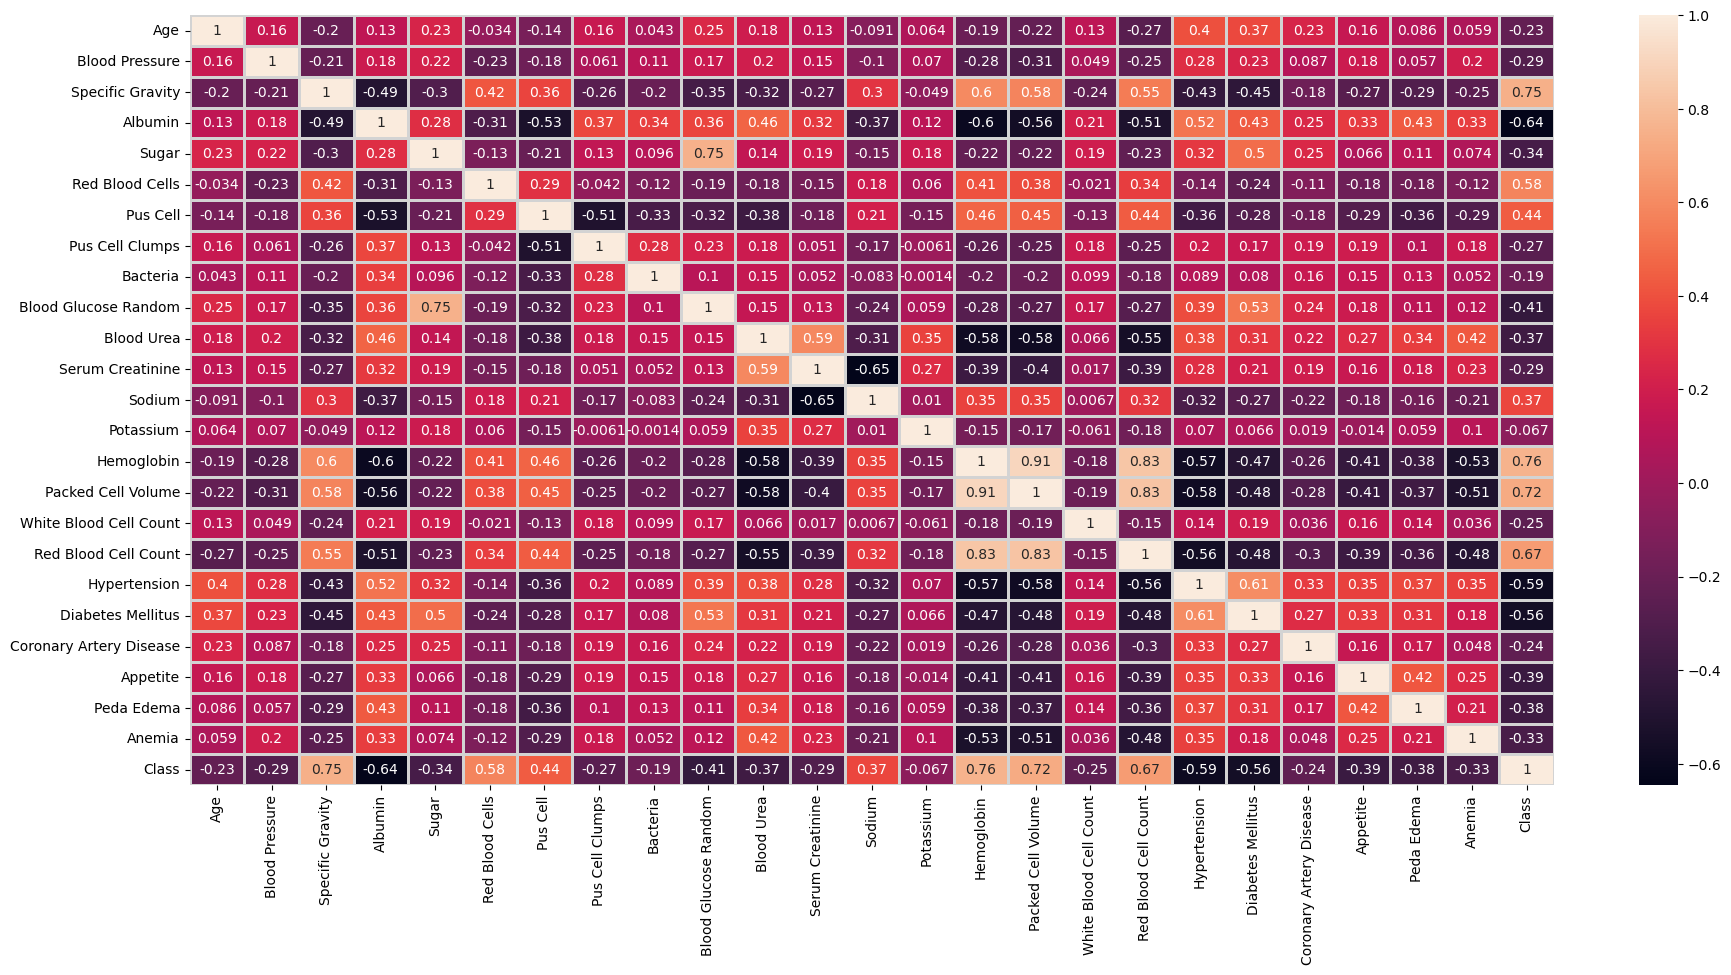

In [376]:
plt.figure(figsize = (22,10))

sns.heatmap(data_train.corr(), annot = True, linewidths = 2, linecolor = 'lightgrey')
plt.show()

In [ ]:
# data_train_imputed = Imputer_mice.transform(data_train)
# data_train_imputed[:10]

In [ ]:
# data_train_imputed[:].round()

In [ ]:
# data.loc[:,[imputed_col_encoded]]=data_train_imputed[:].round()
# data.head(7)

In [ ]:
# Red_Blood_Cells = list(lb.inverse_transform(data[imputed_col_encoded].round().astype('int')))
# Red_Blood_Cells[:10]

In [297]:
for columns in data_train[Nominal_Cols]:
    data_train[columns] = list(lb.inverse_transform(data_train[columns]))

ValueError: y contains previously unseen labels: [0.06551587 0.10100044 0.14931821 0.23       0.30020238 0.30550636
 0.31685919 0.34147727 0.34446596 0.39137418 0.39794266 0.4127197
 0.41410714 0.41793038 0.45466667 0.45645377 0.46153571 0.5
 0.50216667 0.5245338  0.52705556 0.53531469 0.552      0.55582939
 0.56833333 0.57181818 0.572      0.60652381 0.61704798 0.6272759
 0.64139286 0.64925458 0.68466667 0.68785714 0.69       0.73211078
 0.7359427  0.73659091 0.7397015  0.74016178 0.74958174 0.76147619
 0.76166667 0.76438859 0.76521429 0.76842105 0.79350039 0.79702381
 0.79800362 0.80787157 0.82772192 0.83152381 0.83318944 0.83333333
 0.85397186 0.86       0.89633333 0.93699248 0.94808333 0.94903175
 0.95704299]

In [296]:
data_train[Nominal_Cols].isnull().sum()

Red Blood Cells            0
Pus Cell                   0
Pus Cell Clumps            0
Bacteria                   0
Hypertension               0
Diabetes Mellitus          0
Coronary Artery Disease    0
Appetite                   0
Peda Edema                 0
Anemia                     0
Class                      0
dtype: int64

In [ ]:
# membuat atribut baru
data['Red_Blood_Cells'] = Red_Blood_Cells 

# data['Red Blood Cells'] = Red_Blood_Cells menimpa data sebelumnya
data

In [ ]:
data['Red_Blood_Cells'].value_counts()

In [ ]:
data['Red Blood Cells'] = data['Red_Blood_Cells']

In [ ]:
data

In [ ]:
data['Red Blood Cells'].value_counts()

In [ ]:
data

In [ ]:
data['Red Blood Cells'].value_counts()

In [ ]:
data.drop('Red_Blood_Cells', axis=1, inplace=True)

In [ ]:
data.drop('Red Blood Cells_no', axis=1, inplace=True) 

In [ ]:
data

In [ ]:
# data.corr()

In [ ]:
# Visualisasi heatmap dari korelasi atribut data 

# plt.figure(figsize=(20,10))

# sns.heatmap(data.corr(), annot= True, linewidths=2, linecolor='lightgrey')

In [ ]:
# print('Distributions of first 25 columns')

# plt.figure(figsize = (20, 15))
# plotnumber = 1

# for col in data.columns[:25]:
#     ax = plt.subplot(5, 5, plotnumber)
#     sns.histplot(data[col], kde=True, ax=ax, color='blue')
#     plt.xlabel(col)
#     plotnumber += 1

# plt.tight_layout()
# plt.show()

In [ ]:
# data_new.value_counts(['Class'])

In [ ]:
# from sklearn.preprocessing import StandardScaler

# scale = StandardScaler()

# data_new = scale.fit_transform(data_new)
# data_new = pd.DataFrame(data_new, columns= ['Age', 'Blood Pressure', 'Specific Gravity', 'Albumin', 'Sugar',
#        'Red Blood Cells', 'Pus Cell', 'Pus Cell Clumps', 'Bacteria',
#        'Blood Glucose Random', 'Blood Urea', 'Serum Creatinine', 'Sodium',
#        'Potassium', 'Haemoglobin', 'Packed Cell Volume',
#        'White Blood Cell Count', 'Red Blood Cell Count', 'Hypertension',
#        'Diabetes Mellitus', 'Coronary Artery Disease', 'Appetite',
#        'Peda Edema', 'Anemia', 'Class'])

In [ ]:
plt.figure(figsize=(10,5))
data_new['Class'].map({0: 'ckd', 1: 'notckd'}).value_counts('Class').plot.pie(autopct='%1.2f%%')
plt.xlabel('Class Imbalanced Data')
plt.tight_layout()
plt.show()

In [ ]:
# data_new.head().round(1)

In [ ]:
# plt.figure(figsize=(20,10))
# plotnumber=1

# for col in data_new.columns[:25]:
#     ax=plt.subplot(5,5 ,plotnumber)
#     sns.boxplot(data_new[col])
#     plt.xlabel(col)
#     plotnumber += 1

# plt.tight_layout()
# plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE
from sklearn.neighbors import LocalOutlierFactor
from collections import Counter
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold, cross_val_score, cross_val_predict
from sklearn.metrics import classification_report,confusion_matrix, precision_score,recall_score, fbeta_score, precision_recall_curve, accuracy_score, ConfusionMatrixDisplay, roc_auc_score


In [ ]:
predictor_variabel = [col for col in data_new.columns if col != 'Class'] #variabel independent
target_label = 'Class' #variabel dependent

X = data_new[predictor_variabel]
y = data_new[target_label].values
#.reshape(-1,1)

In [ ]:
# def print_results(headline, true_value, pred):
#     print(headline)
#     print("accuracy: {}".format(accuracy_score(true_value, pred)))
#     print("precision: {}".format(precision_score(true_value, pred)))
#     print("recall: {}".format(recall_score(true_value, pred)))
#     print("f2: {}".format(fbeta_score(true_value, pred, bebeta=2)))

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=42, test_size=0.20, stratify=y)

In [ ]:
# print("Nilai X_train :", X_train.shape[0])
# print("Nilai X_test :",X_test.shape[0])
# print("Nilai y_train :",Counter(y_train.shape))
# print("Nilai y_test :",Counter(y_test.shape))

In [ ]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train) # Fit & transform ke training set
X_test_scaled = scaler.transform(X_test)

In [ ]:
smote = SMOTE(sampling_strategy='minority')
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_scaled,y_train)
print("Distribusi sebelum SMOTE: ", Counter(y_train))
print("Distribusi setelah SMOTE: ", Counter(y_train_resampled))
print("Distribusi setelah SMOTE: ", (X_train_resampled).shape[0])

In [ ]:
# plt.figure(figsize=(6,4))
# plt.title("Distribusi Setelah SMOTE")
# #plt.scatter(X_train_resampled[y_train_resampled == 0][:, 0],X_train_resampled[y_train_resampled == 0][:, 0], label='Mayoritas (0)', alpha=0.5)
# plt.scatter(X_train_resampled[y_train_resampled == 1][:, 0], X_train_resampled[y_train_resampled == 1][:, 1], label='Minoritas (1)', alpha=0.5, color='red')
# plt.legend()
# plt.show()

In [ ]:
# X_synthetic = X_train_resampled[:]
# X_synthetic.shape[0]

In [ ]:
X_synthetic = X_train_resampled[len(X_train_scaled):] # Ambil hanya data sintetis training ke bawah dari data asli, misal: 500 (data asli) -> 300 (data sintetis) = 800 (total data seluruh) dan tidak berdasarkan kelas 1 atau 0
y_synthetic = y_train_resampled[len(y_train):]
# print("X:",X_synthetic.shape[0])
# print("y:",y_synthetic.shape[0])

In [ ]:
# for k in [5, 10]:
#     lof = LocalOutlierFactor(n_neighbors=k, contamination=0.05)
#     lof.fit(X_synthetic)
#     scores = -lof.negative_outlier_factor_

#     plt.hist(scores, bins=30, alpha=0.5, label=f'k={k}')

# plt.legend()
# plt.title("Distribusi LOF Score")
# plt.xlabel("LOF Score")
# plt.ylabel("Frekuensi")
# plt.show()

In [ ]:
lof_5 = LocalOutlierFactor(n_neighbors=5, contamination=0.05)  # Kontaminasi 5%
outliers_5 = lof_5.fit_predict(X_synthetic)
# outliers[0:30]

X_synthetic_clean_5 = X_synthetic[outliers_5 == 1]
y_synthetic_clean_5 = y_synthetic[outliers_5 == 1]

print(Counter(outliers_5))
print("Jumlah Data Sintetis Setelah LOF pada X:", len(X_synthetic_clean_5))
# print("Jumlah Data Sintetis Setelah LOF pada y:", len(y_synthetic_clean_5))

In [ ]:
# plt.figure(figsize=(10, 6))
# plt.scatter(X_synthetic[:, 0], X_synthetic[:, 1], c='lightgray', label='Original Data')
# plt.scatter(X_synthetic[outliers_5 == -1, 0], X_synthetic[outliers_5 == -1, 1], 
#             c='red', label='Outliers (LOF)', marker='x')
# plt.scatter(X_synthetic_clean_5[:, 0], X_synthetic_clean_5[:, 1], 
#             c='blue', label='Cleaned Data (LOF)', alpha=0.6)
# plt.title('LOF Outlier Detection (n_neighbors=5, contamination=0.05)')
# plt.xlabel('Feature 1')
# plt.ylabel('Feature 2')
# plt.legend()
# plt.grid(True)
# plt.tight_layout()
# plt.show()

In [ ]:
lof_10 = LocalOutlierFactor(n_neighbors=3, contamination=0.05)  # Kontaminasi 5%
outliers_10 = lof.fit_predict(X_synthetic)

X_synthetic_clean_10 = X_synthetic[outliers_10 == 1]
y_synthetic_clean_10 = y_synthetic[outliers_10 == 1]

print(Counter(outliers_10))
print("Jumlah Data Sintetis Setelah LOF pada X:", len(X_synthetic_clean_10))
# print("Jumlah Data Sintetis Setelah LOF pada y:", len(y_synthetic_clean_10))

In [ ]:
# plt.figure(figsize=(10, 6))
# plt.scatter(X_synthetic[:, 0], X_synthetic[:, 1], c='lightgray', label='Original Data')
# plt.scatter(X_synthetic[outliers_10 == -1, 0], X_synthetic[outliers_10 == -1, 1], 
#             c='red', label='Outliers (LOF)', marker='x')
# plt.scatter(X_synthetic_clean_10[:, 0], X_synthetic_clean_10[:, 1], 
#             c='blue', label='Cleaned Data (LOF)', alpha=0.6)
# plt.title('LOF Outlier Detection (n_neighbors=10, contamination=0.05)')
# plt.xlabel('Feature 1')
# plt.ylabel('Feature 2')
# plt.legend()
# plt.grid(True)
# plt.tight_layout()
# plt.show()

In [ ]:
# X_train_finall = pd.concat([X_train, X_synthetic_clean],axis=1, ignore_index=True)
# print(X_train_finall)

In [ ]:
# X_train_final = np.vstack((X_train, X_synthetic_clean))
# y_train_final = np.concatenate((y_train.ravel(), y_synthetic_clean))

X_train_final = np.concatenate((X_train, X_synthetic_clean_10)) # X_synthetic_clean data sintetis yang memiliki kelas 1
y_train_final = np.concatenate((y_train.ravel(), y_synthetic_clean))

In [ ]:
# X_train_final.shape[0] #semua data yang telah digabungkan dari data kelas 1 dan kelas 0

In [ ]:
# Counter(y_train_final)

In [ ]:
# Counter(y_train_final)

In [ ]:
# kfold = KFold(n_splits=10, shuffle=True, random_state=42)

In [ ]:
rf = RandomForestClassifier(n_estimators=100, criterion="gini")
rf.fit(X_train_final, y_train_final)

In [ ]:
y_pred = rf.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)
print("Confusion Matrix:\n", cm)
print("\nClassification Report:\n", report)

In [ ]:
# Visualisasi confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=rf.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix - Random Forest")
plt.show()

In [ ]:
# cv_scores = cross_val_score(rf, X_train_final, y_train_final, cv=kfold, scoring='accuracy')
# print(f"K-Fold Cross-Validation Scores: {cv_scores}")
# print(f"Mean Accuracy: {cv_scores.mean():.4f}")

In [ ]:
# cv_scores = cross_val_predict(rf, X_train_final, y_train_final, cv=kfold)
# print(f"K-Fold Cross-Validation predict: {cv_scores}")
# print(f"Mean Accuracy: {cv_scores.mean():.4f}")

In [ ]:
# rf.fit(X_train_final, y_train_final)

In [ ]:
# y_pred = rf.predict(X_test_scaled)
# print("Confusion Matrix:\n", confusion_matrix(y_test, cv_scores))
# print("\nClassification Report:\n", classification_report(y_test, cv_scores))

In [ ]:
# conf_matrix = confusion_matrix(y_train_final, cv_scores)

In [ ]:
# y_pred = rf.predict(X_test_scaled)
# print("Confusion Matrix:\n", confusion_matrix(y_test, cv_scores))
# print("\nClassification Report:\n", classification_report(y_test, cv_scores))

In [ ]:
# print("Confusion Matrix dari K-Fold Cross Validation:")
# print(conf_matrix)

# print("\nClassification Report:")
# print(classification_report(y_train_final, cv_scores))

In [ ]:
# print("Distribusi setelah SMOTE:", dict(Counter(y_train_resampled)))

In [ ]:
#rf = RandomForestClassifier(max_features=3, max_depth=2 ,n_estimators=10, random_state=3, criterion="gini", n_jobs=1, verbose=1)

In [ ]:
# print("normal data distribution: {}".format(Counter(y)))
# X_smote, y_smote = SMOTE().fit_sample(X, y)
# print("SMOTE data distribution: {}".format(Counter(y_smote)))

In [ ]:
# print("Normal data distribution: ")
# print('Shape dari X: {}'.format(X.shape))
# print('Shape dari y: {}'.format(y.shape))

In [ ]:
# print("Before OverSampling, counts of label '1': {}".format(sum(y==1)))
# print("Before OverSampling, counts of label '0': {} \n".format(sum(y==0)))

In [ ]:
# smote = SMOTE(sampling_strategy='auto', random_state=42)
# X_train_resampled, y_train_resampled = smote.fit_resample(X, y.ravel())
# #.ravel()

# print('After OverSampling, the shape of train_X: {}'.format(X_train_resampled.shape))
# print('After OverSampling, the shape of train_y: {} \n'.format(y_train_resampled.shape))

# print("After OverSampling, counts of label '1': {}".format(sum(y_train_resampled==1)))
# print("After OverSampling, counts of label '0': {}".format(sum(y_train_resampled==0)))

In [ ]:
# y_train_resampled_series = pd.Series(y_train_resampled)

In [ ]:
# y_train_resampled_series.value_counts()

In [ ]:
# ax = y_train_resampled_series.value_counts().plot.pie(autopct='%.1f%%')
# ax.set_title("Over-sampling")

In [ ]:
# print("Normal data distribution: ")
# print('Shape dari X: {}'.format(X.shape))
# print('Shape dari y: {}'.format(y.shape))

In [ ]:
# lof = LocalOutlierFactor(n_neighbors=20, contamination=0.05)
# outlier_mask = lof.fit_predict(X_train_resampled) # LOF memberikan label -1 untuk outlier

In [ ]:
# X_cleand = X_train_resampled[outlier_mask == 1]
# y_cleand = y_train_resampled_series[outlier_mask == 1]

In [ ]:
# X_train, X_test, y_train, y_test = train_test_split(X_cleand, y_cleand, random_state=42, test_size=0.20)

In [ ]:
# def print_results(headline, true_value, pred):
#     print(headline)
#     print("accuracy: {}".format(accuracy_score(true_value, pred)))
#     print("precision: {}".format(precision_score(true_value, pred)))
#     print("recall: {}".format(recall_score(true_value, pred)))
#     print("f2: {}".format(fbeta_score(true_value, pred, bebeta=2)))

In [ ]:
# smote_pipeline = make_pipeline(SMOTE(random_state=4), classifier(random_state=42))

In [ ]:
# smote_model = smote_pipeline.fit(X_train, y_train)
# smote_prediction = smote_model.predict(X_test)

In [ ]:
# param_grid = {"max_depth": [3,5, None],
#               "n_estimators":[3,5,10],
#               "max_features": [5,6,7,8]}

# model = RandomForestClassifier(max_features=3, max_depth=2 ,n_estimators=10, random_state=3, criterion="gini", n_jobs=1, verbose=1)

In [ ]:
# model = RandomForestClassifier(max_features=3, max_depth=2 ,n_estimators=10, random_state=3, criterion="gini", n_jobs=1, verbose=1)

In [ ]:
# grid_search = GridSearchCV(model, param_grid=param_grid, cv=5, scoring='recall')
# grid_search.fit(X_train, y_train)

In [ ]:
# print(grid_search.best_score_)
# print(grid_search.best_params_)

In [ ]:
# rf = RandomForestClassifier(max_depth=3, max_features = 6, n_estimators = 3)
# rf.fit(X_train, y_train)

In [ ]:
# print("Training score data: ")
# print(rf.score(X_train, y_train))

In [ ]:
# y_pred = rf.predict(X_test)

# print(confusion_matrix(y_test, y_pred))
# print("RF classification",classification_report(y_test, y_pred))

In [ ]:
# features = ['Age','Blood Pressure','Specific Gravity','Albumin','Sugar','Red Blood Cells','Pus Cell',
#                 'Pus Cell Clumps','Bacteria','Blood Glucose Random','Blood Urea','Serum Creatinine','Sodium',
#                 'Potassium','Haemoglobin','Packed Cell Volume','White Blood Cell Count','Red Blood Cell Count',
#                 'Hypertension','Diabetes Mellitus','Coronary Artery Disease','Appetite','Peda Edema','Anemia']

# plt.figure(figsize = (9,5))

# feat_import = pd.DataFrame({'Feature': features, 'Feature importance': rf.feature_importances_})
# feat_import = feat_import.sort_values(by='Feature importance',ascending=False)

# g = sns.barplot(x='Feature',y='Feature importance',data=feat_import)
# g.set_xticklabels(g.get_xticklabels(),rotation=90)
# g.set_title('Features importance - Random Forest',fontsize=20)
# plt.show() 

In [ ]:
# y_predict = rf.predict(X_test)

# print("Akurasi:", classification_report(y_test, y_predict))

In [ ]:
# scores = cross_val_score(rf, X_train, y_train, cv=5)
# print("Akurasi Cross Validation:",scores)

#### 4. Transformasi Data 

In [ ]:
# # heatmap of data

# plt.figure(figsize = (25, 10))

sns.heatmap(data.corr(), annot = True, linewidths = 2, linecolor = 'lightgrey')
plt.show()

## **DATA PREPARATION**

<a id = '2.0'></a>
<p style = "font-size : 40px; color : #34656d ; font-family : 'Comic Sans MS'; text-align : center; background-color : #f9b208; border-radius: 5px 5px;"><strong>DATA PREPARATION</strong></p> 

<a id = '2.0'></a>
<p style = "font-size : 40px; color : #34656d ; font-family : 'Comic Sans MS'; text-align : center; background-color : #f9b208; border-radius: 5px 5px;"><strong>Exploratory Data Analysis (EDA)</strong></p> 

<a id = '3.0'></a>
<p style = "font-size : 40px; color : #34656d ; font-family : 'Comic Sans MS'; text-align : center; background-color : #f9b208; border-radius: 5px 5px;"><strong>Data Pre Processing</strong></p> 

<a id = '4.0'></a>
<p style = "font-size : 35px; color : #34656d ; font-family : 'Comic Sans MS'; text-align : center; background-color : #f9b208; border-radius: 5px 5px;"><strong>Feature Encoding</strong></p> 

<a id = '5.0'></a>
<p style = "font-size : 45px; color : #34656d ; font-family : 'Comic Sans MS'; text-align : center; background-color : #f9b208; border-radius: 5px 5px;"><strong>Model Building</strong></p> 

<a id = '6.0'></a>
<p style = "font-size : 35px; color : #34656d ; font-family : 'Comic Sans MS'; text-align : center; background-color : #f9b208; border-radius: 5px 5px;"><strong>Models Comparison</strong></p> 

In [ ]:
# models = pd.DataFrame({
#     'Model' : [ 'KNN', 'Decision Tree Classifier', 'Random Forest Classifier','Ada Boost Classifier',
#              'Gradient Boosting Classifier', 'Stochastic Gradient Boosting', 'XgBoost', 'Cat Boost', 'Extra Trees Classifier'],
#     'Score' : [knn_acc, dtc_acc, rd_clf_acc, ada_acc, gb_acc, sgb_acc, xgb_acc, cat_acc, etc_acc]
# })


# models.sort_values(by = 'Score', ascending = False)

In [ ]:
# px.bar(data_frame = models, x = 'Score', y = 'Model', color = 'Score', template = 'plotly_dark', 
#        title = 'Models Comparison')